In [1]:
# prompt: koreanize 패키지 임포트해줘
!pip install koreanize-matplotlib
import koreanize_matplotlib

# prompt: 시각화를 위한 패키기 임포트해줘
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# 경고무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install openpyxl if not already installed
!pip install openpyxl

In [3]:
df = pd.read_excel('/content/Jeju.xlsx', engine='openpyxl')

In [4]:
# prompt: Monthly_Total 컬럼 제거해줘
df = df.drop(columns=['Monthly_Total'])

In [5]:
df.head()

,Year,Month,Country,Jeju2020,Korea2020
0,2019,1,일본,5145,206526
1,2019,1,중국,61889,392814
2,2019,1,홍콩,2544,35896
3,2019,1,대만,5383,87954
4,2019,1,싱가폴,1825,9855


In [6]:
# prompt: Country값이 소계, 기타인경우 해당 행을 제거해줘
# 기존 코드는 그대로 유지
df = df[~df['Country'].isin(['소계', '기타'])]
df.head()

,Year,Month,Country,Jeju2020,Korea2020
0,2019,1,일본,5145,206526
1,2019,1,중국,61889,392814
2,2019,1,홍콩,2544,35896
3,2019,1,대만,5383,87954
4,2019,1,싱가폴,1825,9855


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 718
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       600 non-null    int64 
 1   Month      600 non-null    int64 
 2   Country    600 non-null    object
 3   Jeju2020   600 non-null    int64 
 4   Korea2020  600 non-null    object
dtypes: int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.head()

,Year,Month,Country,Jeju2020,Korea2020
0,2019,1,일본,5145,206526
1,2019,1,중국,61889,392814
2,2019,1,홍콩,2544,35896
3,2019,1,대만,5383,87954
4,2019,1,싱가폴,1825,9855


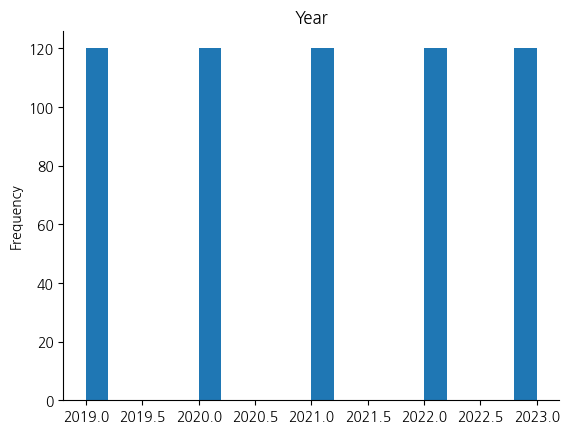

In [9]:
# @title Year

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.shape

(600, 5)

In [11]:
df = df.rename(columns = {'Jeju2020':'Jeju', 'Korea2020':'Korea'})

In [12]:
# prompt: ',' 가 포함된 숫자값이 있는 df['Korea'] 컬럼을 int 값으로 바꿔줘

# Check if 'Korea' column exists and has string values with commas
if 'Korea' in df.columns and df['Korea'].dtype == 'object':
    # Remove commas and convert to numeric
    df['Korea'] = df['Korea'].astype(str).str.replace(',', '', regex=False).astype(int)

# Alternative approach using to_numeric with errors='coerce'
# This handles cases where the conversion fails gracefully (non-numeric values become NaN)
# df['Korea'] = pd.to_numeric(df['Korea'].astype(str).str.replace(',', '', regex=False), errors='coerce').fillna(0).astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 718
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     600 non-null    int64 
 1   Month    600 non-null    int64 
 2   Country  600 non-null    object
 3   Jeju     600 non-null    int64 
 4   Korea    600 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
# Extract the desired values
jeju_sum = df['Jeju'].sum()
korea_sum = df['Korea'].sum()


# Create a DataFrame for better presentation
summary_df = pd.DataFrame({
    '지역': ['제주', '한국'],
    '합계': [jeju_sum, korea_sum]
})

# Display the summary table
summary_df

,지역,합계
0,제주,2529266
1,한국,27559457


In [15]:
# prompt: 연도별 제주도, 한국 방문숫자와 (제주/한국) 비율을 피벗테이블로 만들어줘

# Create the pivot table
pivot_df = pd.pivot_table(df, values=['Jeju', 'Korea'], index='Year', aggfunc='sum')

# Calculate the ratio
pivot_df['Ratio'] = pivot_df['Jeju'] / pivot_df['Korea']

# Display the pivot table
pivot_df

,Jeju,Korea,Ratio
Year,,,
2019,1553909,14352840,0.108265
2020,174514,1885015,0.092580
2021,21390,484734,0.044127
2022,61050,1908784,0.031984
2023,718403,8928084,0.080466


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 718
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     600 non-null    int64 
 1   Month    600 non-null    int64 
 2   Country  600 non-null    object
 3   Jeju     600 non-null    int64 
 4   Korea    600 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.1+ KB


In [17]:
df.head()

,Year,Month,Country,Jeju,Korea
0,2019,1,일본,5145,206526
1,2019,1,중국,61889,392814
2,2019,1,홍콩,2544,35896
3,2019,1,대만,5383,87954
4,2019,1,싱가폴,1825,9855


In [18]:
# prompt: 국가별 jeju, korea 합 구하고 내림차순으로 정리해줘

# Check if 'Korea' column exists and has string values with commas
if 'Korea' in df.columns and df['Korea'].dtype == 'object':
    # Remove commas and convert to numeric
    df['Korea'] = df['Korea'].astype(str).str.replace(',', '', regex=False).astype(int)

# Group by country and sum Jeju and Korea values
country_sums = df.groupby('Country').agg({'Jeju': 'sum', 'Korea': 'sum'})

# Calculate the total (Jeju + Korea) for each country
country_sums['Total'] = country_sums['Jeju'] + country_sums['Korea']

# Sort by total in descending order
country_sums = country_sums.sort_values('Total', ascending=False)

# Display the result
country_sums

,Jeju,Korea,Total
Country,,,
중국,1666195,9334239,11000434
일본,153844,6432485,6586329
미국,100928,3130630,3231558
대만,173407,2497534,2670941
홍콩,87724,1276789,1364513
태국,97796,1220505,1318301
베트남,40578,1267265,1307843
싱가폴,82974,828986,911960
말레이시아,92138,808569,900707


In [19]:
# prompt: 국가별 연도별 jeju, korea합 구하고 평균값으로 내림차순으로 정리해줘

# Group by 'Country' and 'Year', then sum 'Jeju' and 'Korea'
grouped_df = df.groupby(['Country', 'Year']).agg({'Jeju': 'sum', 'Korea': 'sum'})


# Reset the index to make 'Country' and 'Year' regular columns
grouped_df = grouped_df.reset_index()

# Calculate the average total per country
average_total_by_country = grouped_df.groupby('Country')['Jeju'].mean()

# Sort the countries by average total in descending order
sorted_countries = average_total_by_country.sort_values(ascending=False)

# Display the result
sorted_countries

,Jeju
Country,
중국,333239.0
대만,34681.4
일본,30768.8
미국,20185.6
태국,19559.2
말레이시아,18427.6
홍콩,17544.8
싱가폴,16594.8
베트남,8115.6


In [20]:
# prompt: 국가별 연도별 jeju, korea합 구하고 평균값으로 내림차순으로 정리해줘

# Group by 'Country' and 'Year', then sum 'Jeju' and 'Korea'
grouped_df = df.groupby(['Country', 'Year', 'Month']).agg({'Jeju': 'sum'})


# Reset the index to make 'Country' and 'Year' regular columns
grouped_df = grouped_df.reset_index()

# Calculate the average total per country
average_total_by_country = grouped_df.groupby('Country')['Jeju'].mean()

# Sort the countries by average total in descending order
sorted_countries = average_total_by_country.sort_values(ascending=False)

# Display the result
sorted_countries

,Jeju
Country,
중국,27769.916667
대만,2890.116667
일본,2564.066667
미국,1682.133333
태국,1629.933333
말레이시아,1535.633333
홍콩,1462.066667
싱가폴,1382.900000
베트남,676.300000


In [21]:
# 월 관광객 수 max
# Group by 'Country' and 'Year', then sum 'Jeju' and 'Korea'
grouped_df = df.groupby(['Country', 'Year', 'Month']).agg({'Jeju': 'max'})


# Reset the index to make 'Country' and 'Year' regular columns
grouped_df = grouped_df.reset_index()

# Calculate the average total per country
average_total_by_country = grouped_df.groupby('Country')['Jeju'].max()

# Sort the countries by average total in descending order
sorted_countries = average_total_by_country.sort_values(ascending=False)

# Display the result
sorted_countries

,Jeju
Country,
중국,120043
일본,13178
대만,10263
말레이시아,7489
태국,6705
홍콩,6633
미국,5769
싱가폴,4805
베트남,3238


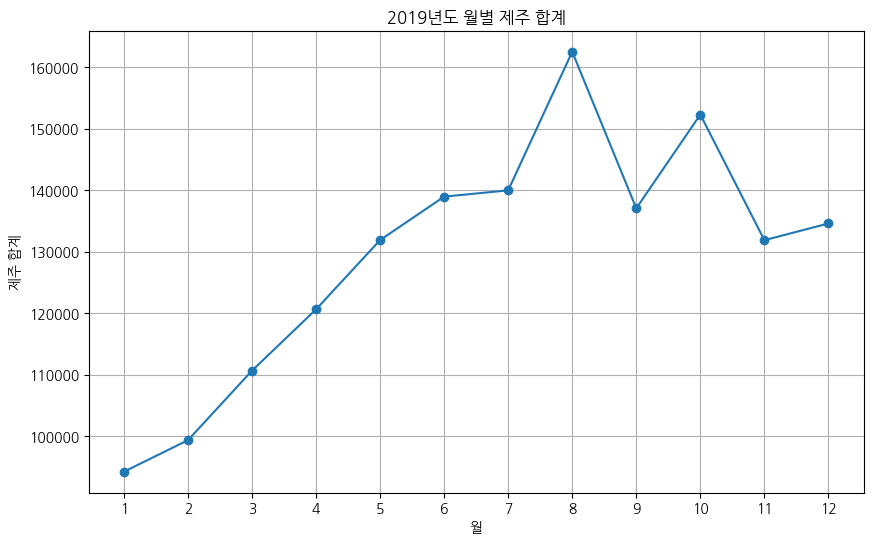

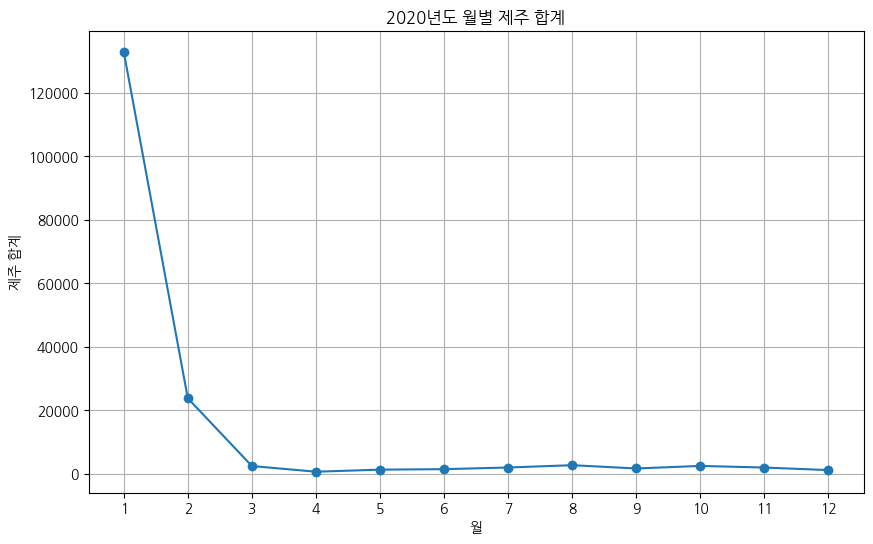

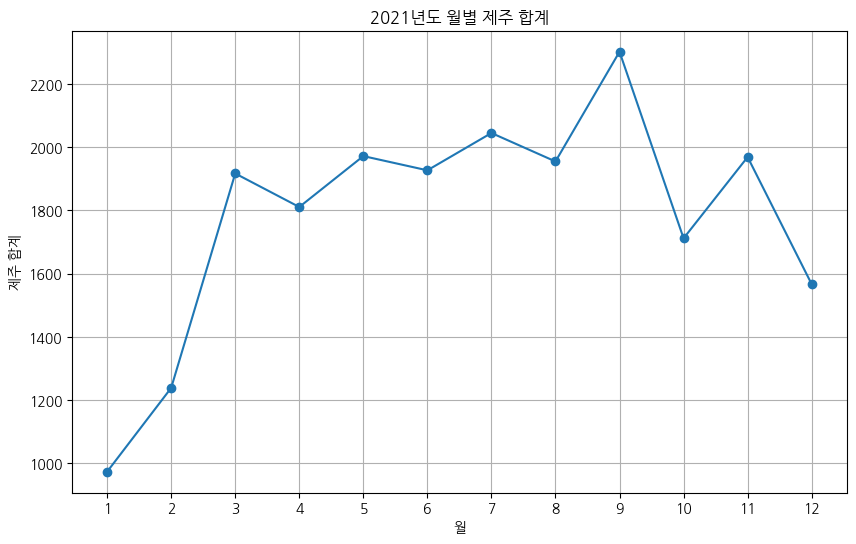

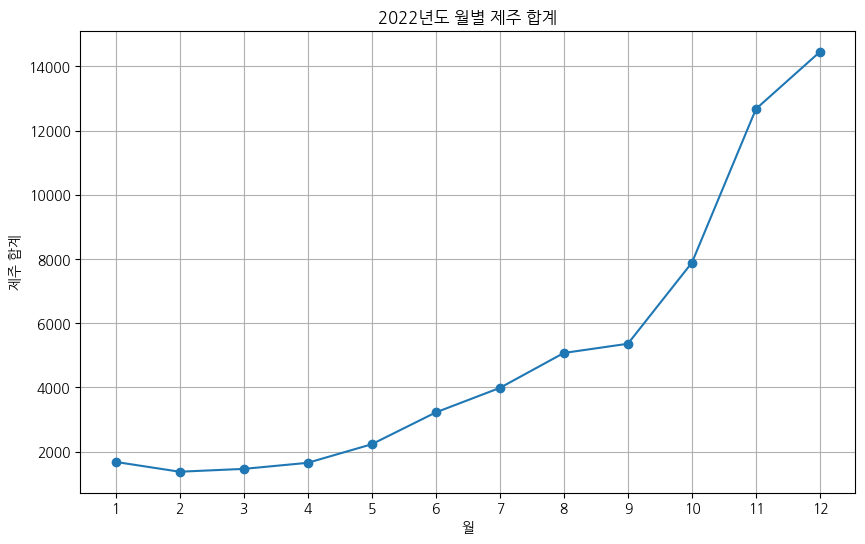

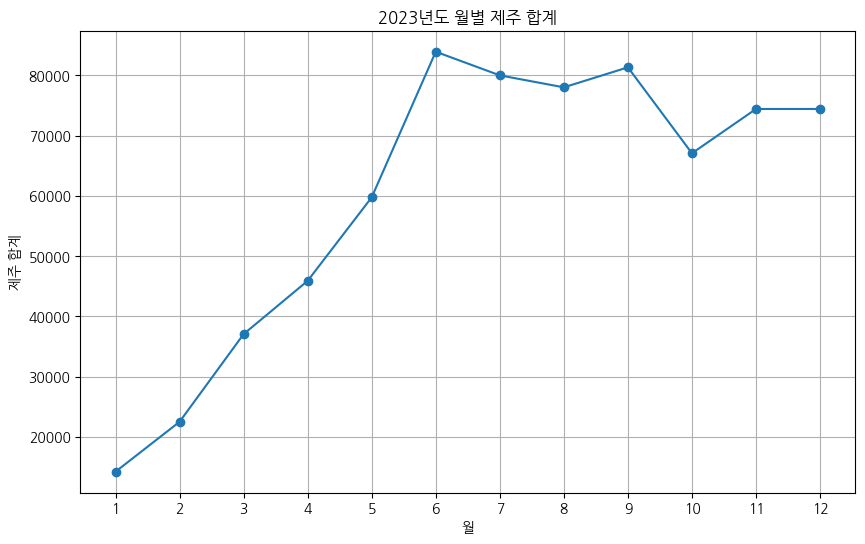

In [22]:
# prompt: 2019년도부터 2023년도까지 각각의 연도를 구분해서 월별groupby로 Jeju합을 구해 시계열  라인그래프로 시각화 해줘

# 연도별 월별 Jeju 합계 계산 및 시각화
import matplotlib.pyplot as plt

# 연도별 데이터프레임 생성
years = range(2019, 2024)
for year in years:
    # 각 연도별 데이터 추출
    df_year = df[df['Year'] == year]

    # 월별 Jeju 합계 계산
    monthly_jeju_sum = df_year.groupby('Month')['Jeju'].sum()

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_jeju_sum.index, monthly_jeju_sum.values, marker='o')
    plt.title(f'{year}년도 월별 제주 합계')
    plt.xlabel('월')
    plt.ylabel('제주 합계')
    plt.xticks(monthly_jeju_sum.index)  # x축 눈금 설정
    plt.grid(True)
    plt.show()

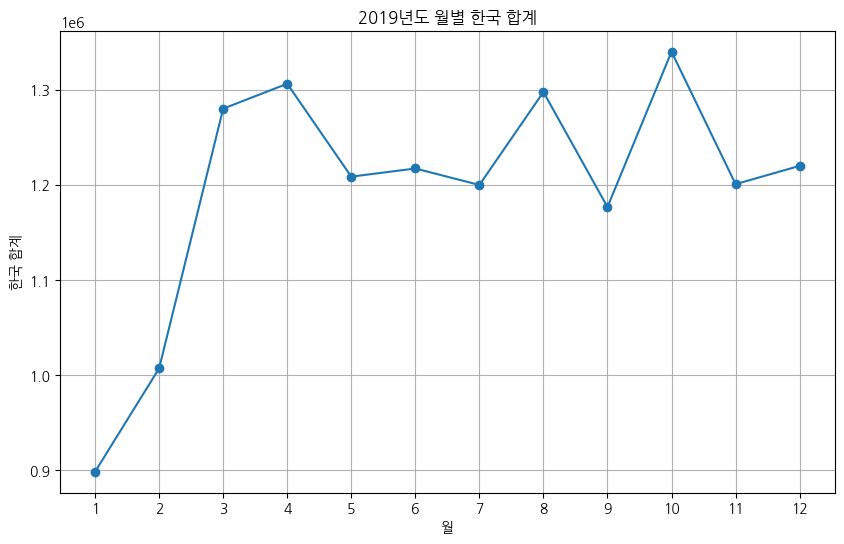

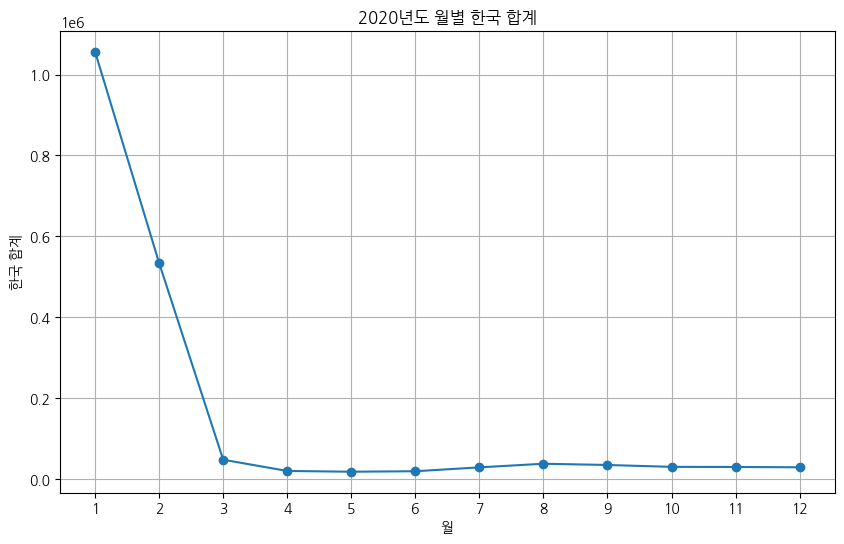

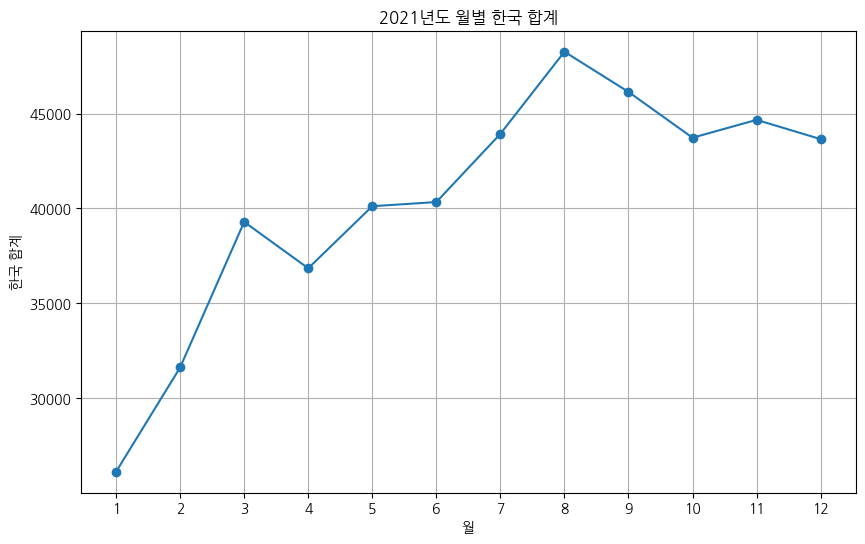

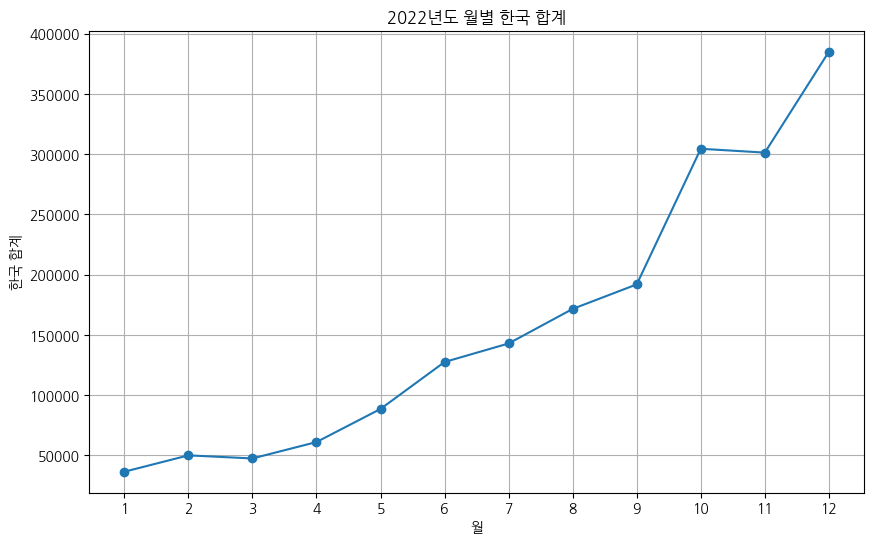

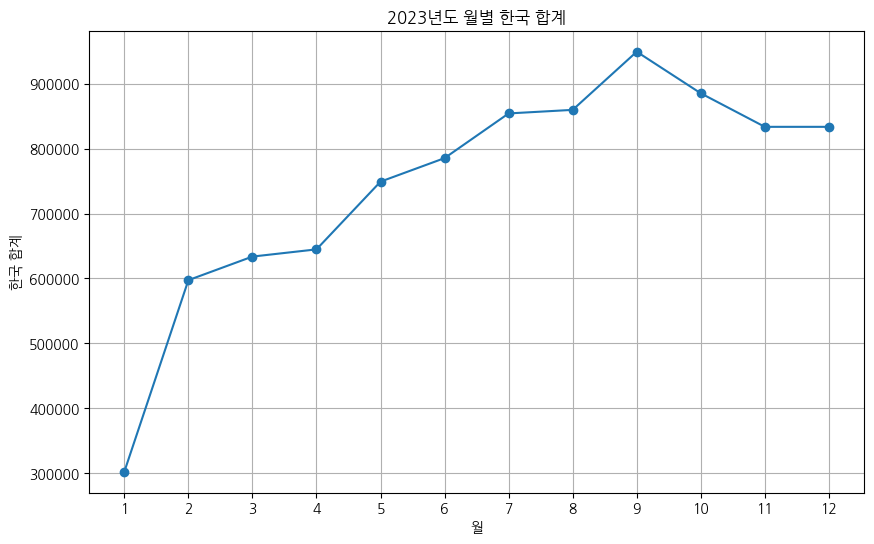

In [23]:
# prompt: 2019년도부터 2023년도까지 각각의 연도를 구분해서 월별groupby로 Korea합을 구해 시계열  라인그래프로 시각화 해줘

# 연도별 월별 Korea 합계 계산 및 시각화
import matplotlib.pyplot as plt

# 연도별 데이터프레임 생성
years = range(2019, 2024)
for year in years:
    # 각 연도별 데이터 추출
    df_year = df[df['Year'] == year]

    # 월별 Korea 합계 계산
    monthly_korea_sum = df_year.groupby('Month')['Korea'].sum()

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_korea_sum.index, monthly_korea_sum.values, marker='o')
    plt.title(f'{year}년도 월별 한국 합계')
    plt.xlabel('월')
    plt.ylabel('한국 합계')
    plt.xticks(monthly_korea_sum.index)  # x축 눈금 설정
    plt.grid(True)
    plt.show()

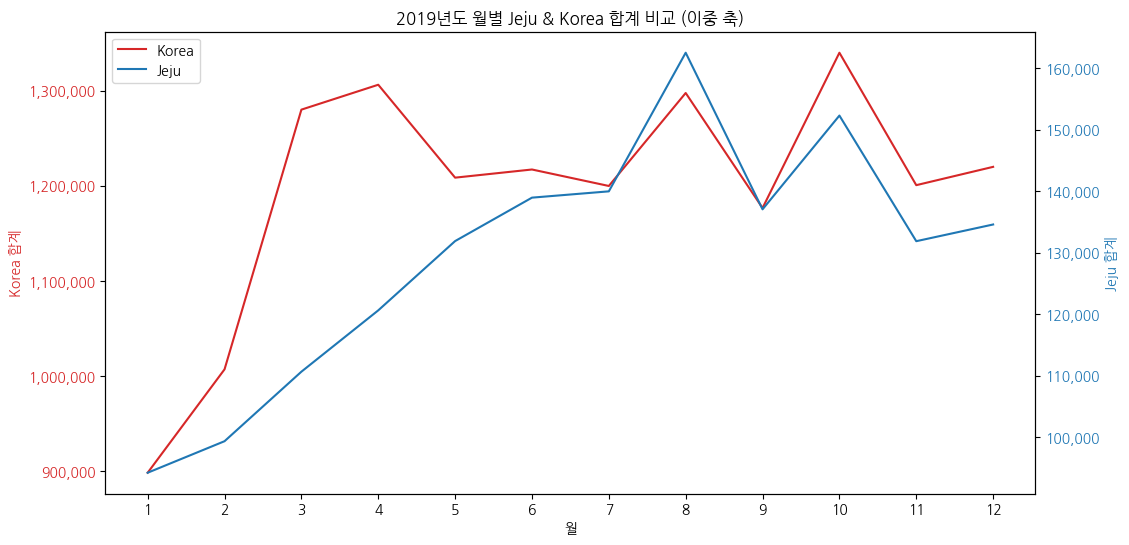

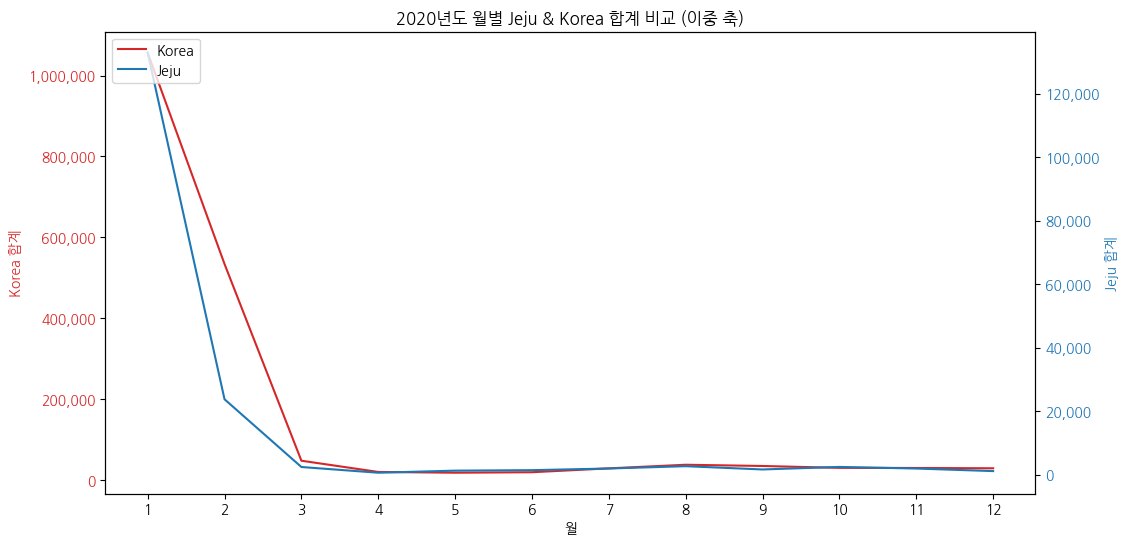

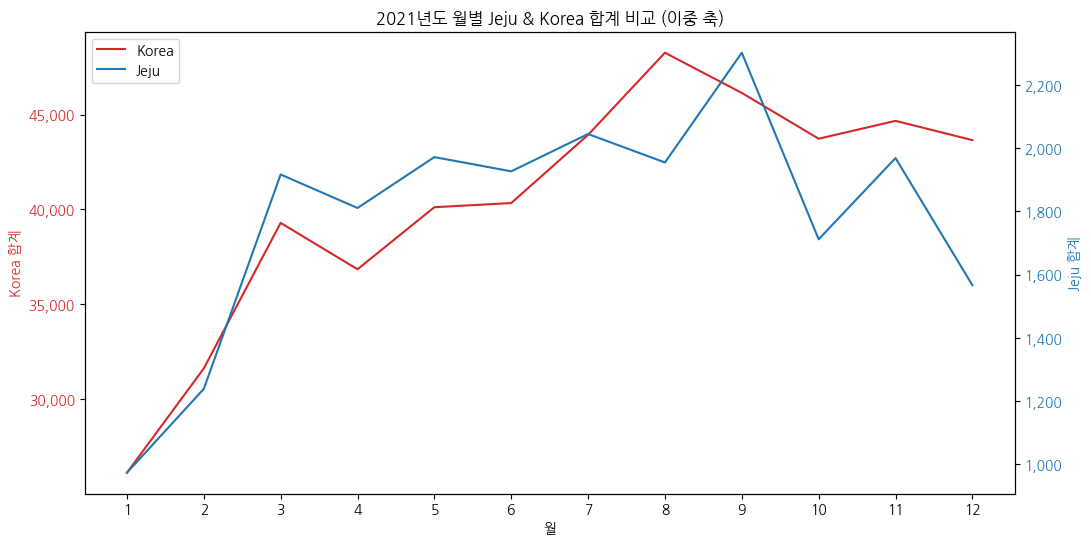

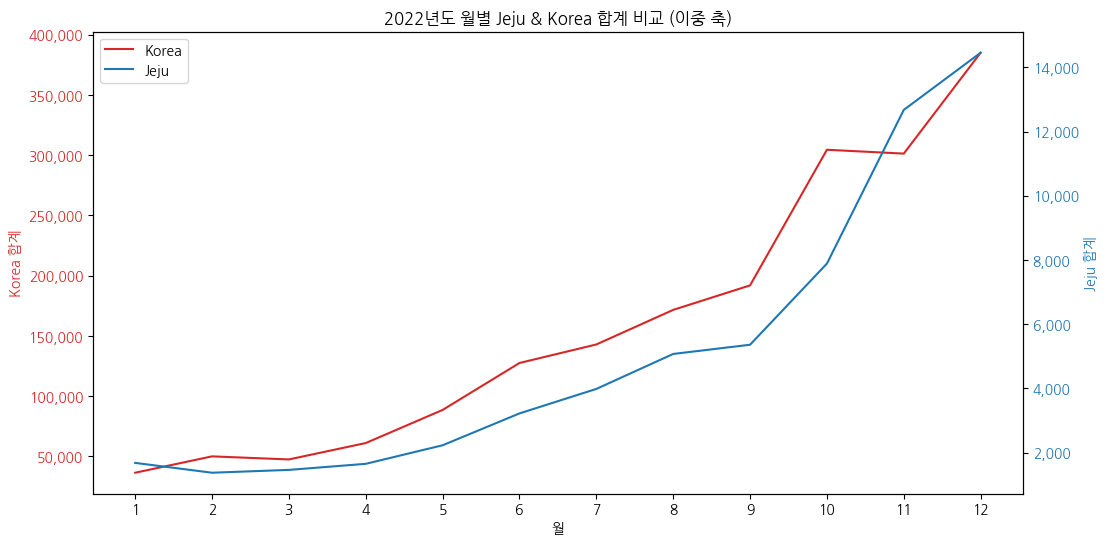

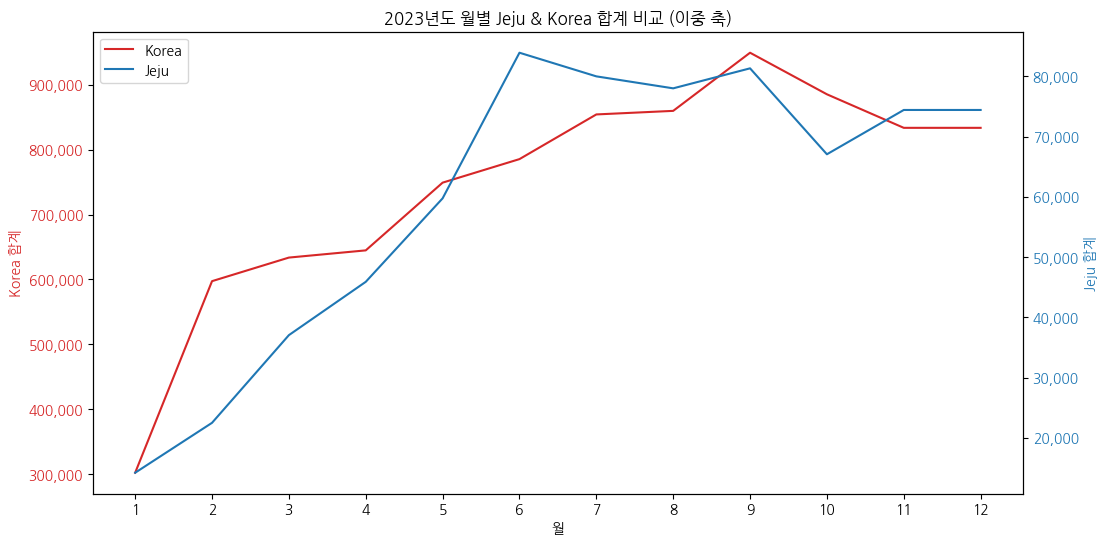

In [24]:
# prompt: df 를 활용해 2019년도부터 2023년도까지 각각의 연도를 구분해서 월별groupby로 Jeju , Korea합을 구해 시계열  라인그래프로 시각화해 이중축으로 비교해줘

# 연도별 월별 Jeju, Korea 합계 계산 및 시각화 (이중 축)
import matplotlib.ticker as ticker

years = range(2019, 2024)
for year in years:
    # 각 연도별 데이터 추출
    df_year = df[df['Year'] == year]

    # 월별 Jeju, Korea 합계 계산
    monthly_data = df_year.groupby('Month').sum()

    # 이중 축 그래프 생성
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 첫 번째 y축 (Korea)
    color = 'tab:red'
    ax1.set_xlabel('월')
    ax1.set_ylabel('Korea 합계', color=color)
    ax1.plot(monthly_data.index, monthly_data['Korea'], color=color, label='Korea')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # 두 번째 y축 (Jeju)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Jeju 합계', color=color)
    ax2.plot(monthly_data.index, monthly_data['Jeju'], color=color, label='Jeju')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # 범례 설정
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # 그래프 제목 및 x축 눈금 설정
    plt.title(f'{year}년도 월별 Jeju & Korea 합계 비교 (이중 축)')
    plt.xticks(monthly_data.index)

    # 그래프 표시
    plt.show()

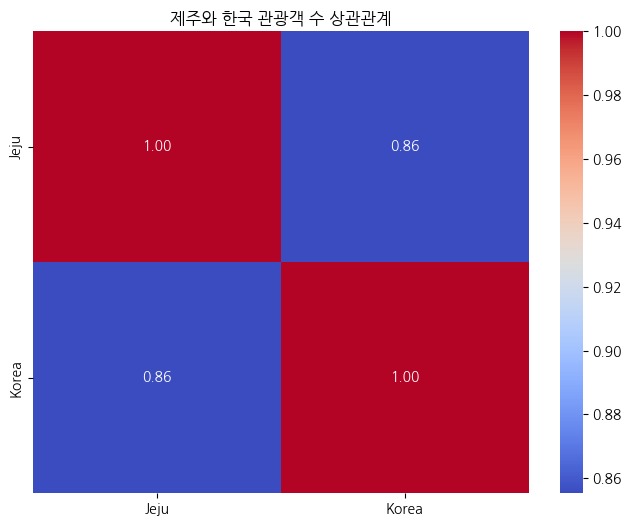

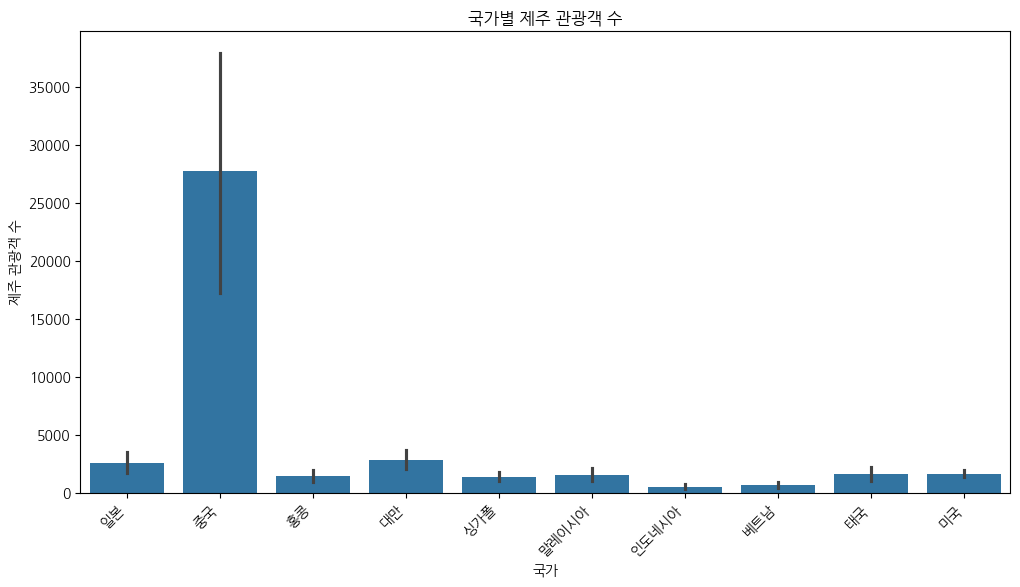

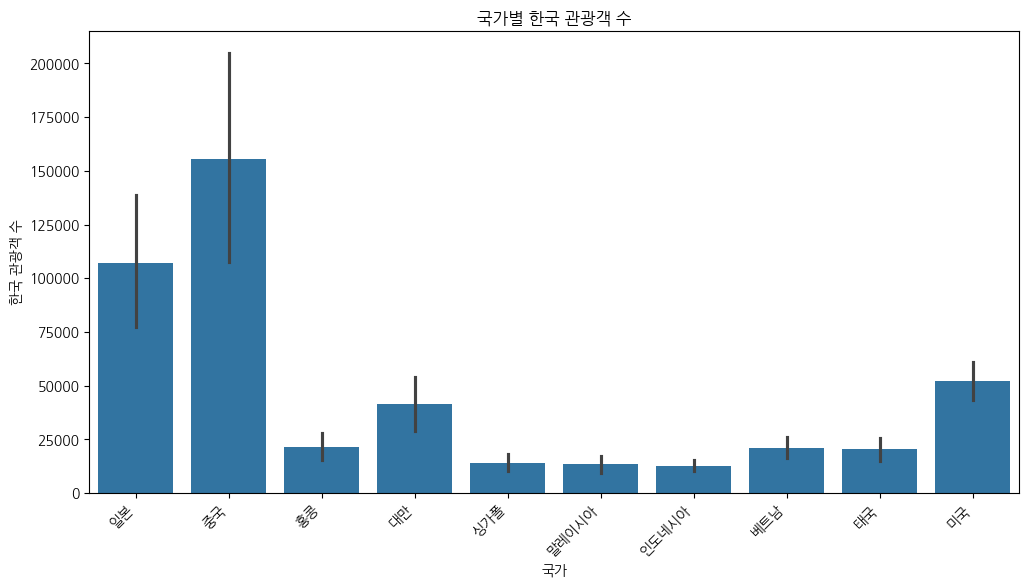

              Year       Month           Jeju          Korea
count   600.000000  600.000000     600.000000     600.000000
mean   2021.000000    6.500000    4215.443333   45932.428333
std       1.415394    3.454933   14554.358031   89304.146876
min    2019.000000    1.000000       0.000000      24.000000
25%    2020.000000    3.750000      70.000000    1373.000000
50%    2021.000000    6.500000     455.500000   16060.000000
75%    2022.000000    9.250000    2623.750000   43110.500000
max    2023.000000   12.000000  120043.000000  578112.000000


In [25]:
# prompt: df파일 eda 해줘

# 상관관계 분석
correlation_matrix = df[['Jeju', 'Korea']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('제주와 한국 관광객 수 상관관계')
plt.show()

# 국가별 관광객 수 시각화 (막대 그래프)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Jeju', data=df)
plt.title('국가별 제주 관광객 수')
plt.xlabel('국가')
plt.ylabel('제주 관광객 수')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Korea', data=df)
plt.title('국가별 한국 관광객 수')
plt.xlabel('국가')
plt.ylabel('한국 관광객 수')
plt.xticks(rotation=45, ha='right')
plt.show()

# Describe
print(df.describe())

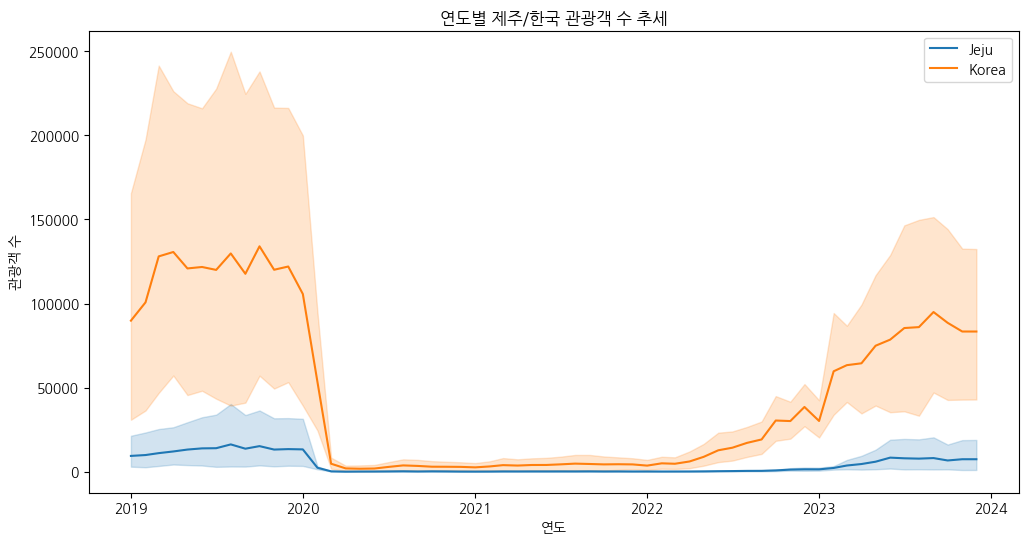

In [26]:
# prompt: df 시계열로도 eda해줘

# 시계열 데이터 EDA 추가

# 날짜 데이터 생성 (Year와 Month를 결합)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df = df.set_index('Date')

# 연도별 추세 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Jeju', label='Jeju')
sns.lineplot(data=df, x=df.index, y='Korea', label='Korea')
plt.title('연도별 제주/한국 관광객 수 추세')
plt.xlabel('연도')
plt.ylabel('관광객 수')
plt.legend()
plt.show()

In [27]:
df

,Year,Month,Country,Jeju,Korea
Date,,,,,
2019-01-01,2019,1,일본,5145,206526
2019-01-01,2019,1,중국,61889,392814
2019-01-01,2019,1,홍콩,2544,35896
2019-01-01,2019,1,대만,5383,87954
2019-01-01,2019,1,싱가폴,1825,9855
...,...,...,...,...,...
2023-12-01,2023,12,말레이시아,792,33106
2023-12-01,2023,12,인도네시아,408,27708
2023-12-01,2023,12,베트남,659,31728


In [28]:
df = df.reset_index()

In [29]:
# prompt: 국가별 시계열 추세 분석해줘

# 국가별 관광객 수 시계열 추세 분석 (plotly)

# 국가별 데이터 추출
countries = df['Country'].unique()

# plotly를 이용한 시계열 그래프
for country in countries:
    country_df = df[df['Country'] == country]
    fig = px.line(country_df, x='Date', y=['Jeju', 'Korea'], title=f'{country} 관광객 수 시계열 추세')
    fig.update_xaxes(title_text='날짜')
    fig.update_yaxes(title_text='관광객 수')
    fig.show()

In [30]:
df['Ratio'] = df['Jeju']/df['Korea']

In [31]:
df[df['Ratio'] > 1]

,Date,Year,Month,Country,Jeju,Korea,Ratio
162,2020-05-01,2020,5,홍콩,40,24,1.666667
164,2020-05-01,2020,5,싱가폴,75,49,1.530612
165,2020-05-01,2020,5,말레이시아,108,90,1.200000
174,2020-06-01,2020,6,싱가폴,53,50,1.060000
175,2020-06-01,2020,6,말레이시아,140,121,1.157025
184,2020-07-01,2020,7,싱가폴,48,44,1.090909
185,2020-07-01,2020,7,말레이시아,148,136,1.088235
195,2020-08-01,2020,8,말레이시아,294,276,1.065217
215,2020-10-01,2020,10,말레이시아,228,180,1.266667


In [32]:
# prompt: 국가별 시계열 추세 분석해줘

# 국가별 관광객 수 시계열 추세 분석 (plotly)

# 국가별 데이터 추출
countries = df['Country'].unique()

# plotly를 이용한 시계열 그래프
for country in countries:
    country_df = df[df['Country'] == country]
    fig = px.line(country_df, x='Date', y=['Ratio'], title=f'{country} 관광객 수 시계열 추세')
    fig.update_xaxes(title_text='날짜')
    fig.update_yaxes(title_text='관광객 수')
    fig.show()

In [33]:
df.columns

Index(['Date', 'Year', 'Month', 'Country', 'Jeju', 'Korea', 'Ratio'], dtype='object')

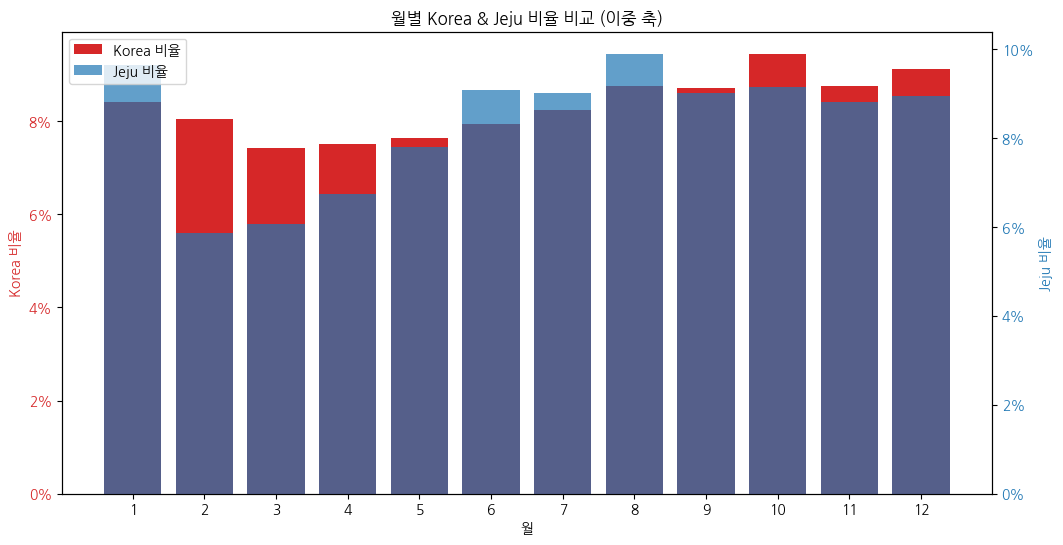

In [34]:
# prompt: 각각의 월을 전체대비 비율로 시각화해서 korea과 jeju을 월별로 막대그래프 이중축을 이용해 비교해줘

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 월별 데이터를 기준으로 Korea와 Jeju의 비율을 계산합니다.
# Changed code: Selecting only 'Korea' and 'Jeju' columns for sum
monthly_data = df.groupby('Month')[['Korea', 'Jeju']].sum()
monthly_data['Korea_Ratio'] = monthly_data['Korea'] / monthly_data['Korea'].sum()
monthly_data['Jeju_Ratio'] = monthly_data['Jeju'] / monthly_data['Jeju'].sum()

# 이중 축 그래프를 생성합니다.
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축 (Korea 비율)
color = 'tab:red'
ax1.set_xlabel('월')
ax1.set_ylabel('Korea 비율', color=color)
ax1.bar(monthly_data.index, monthly_data['Korea_Ratio'], color=color, label='Korea 비율')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


# 두 번째 y축 (Jeju 비율)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Jeju 비율', color=color)
ax2.bar(monthly_data.index, monthly_data['Jeju_Ratio'], color=color, label='Jeju 비율', alpha=0.7) # alpha를 사용하여 투명도 조절
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

# 범례 설정
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 그래프 제목 및 x축 눈금 설정
plt.title('월별 Korea & Jeju 비율 비교 (이중 축)')
plt.xticks(monthly_data.index)

# 그래프 표시
plt.show()

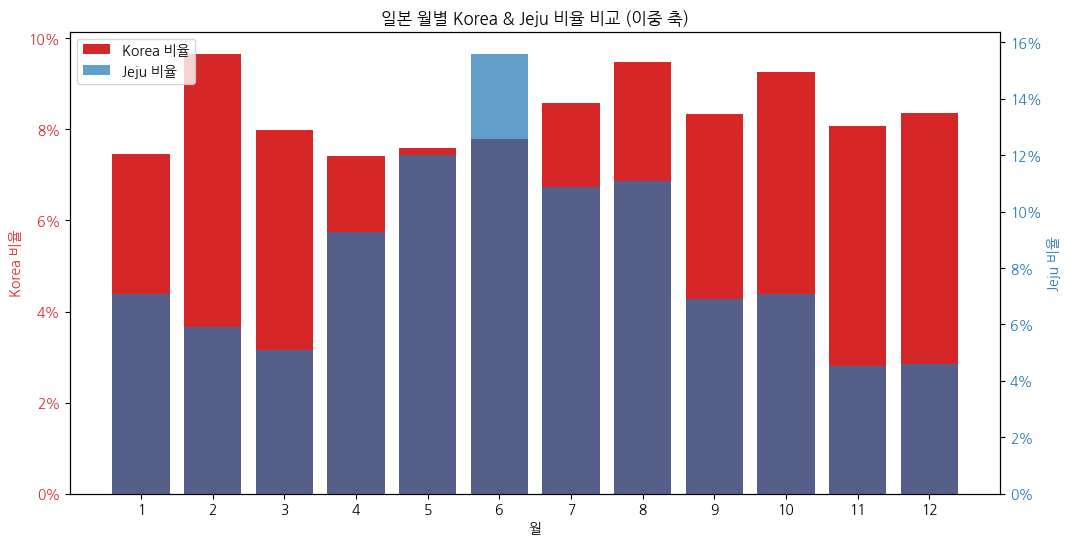

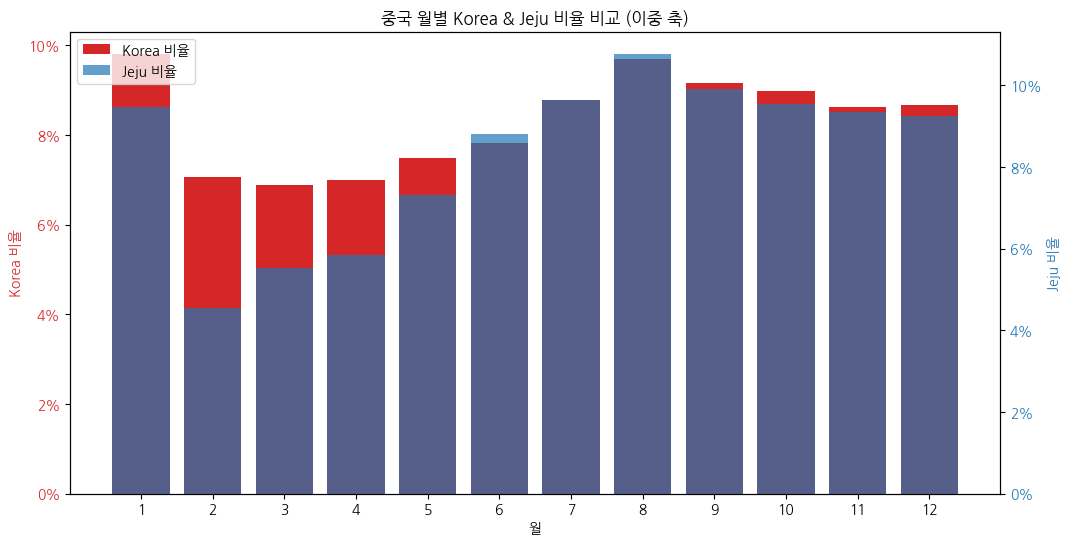

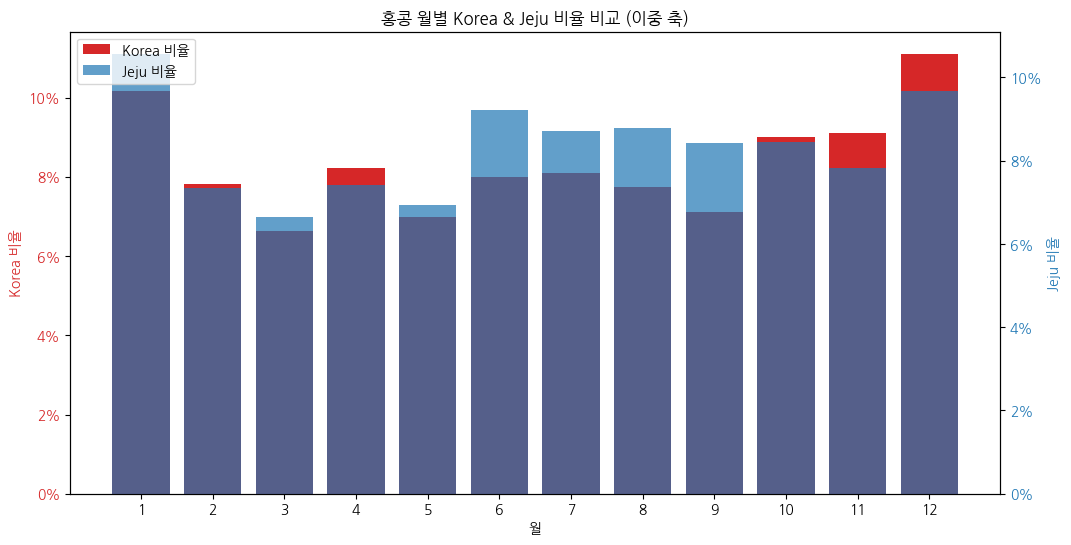

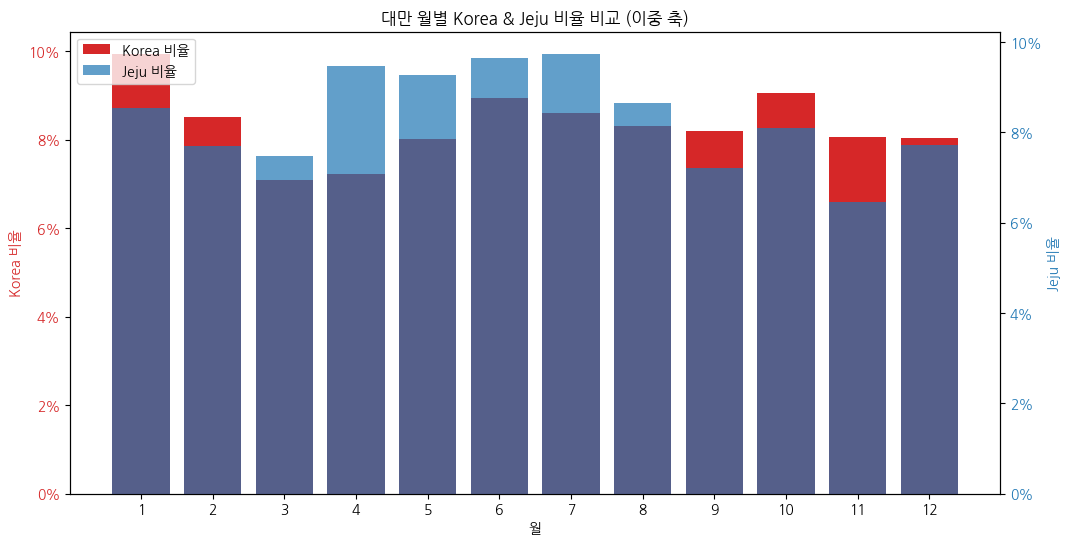

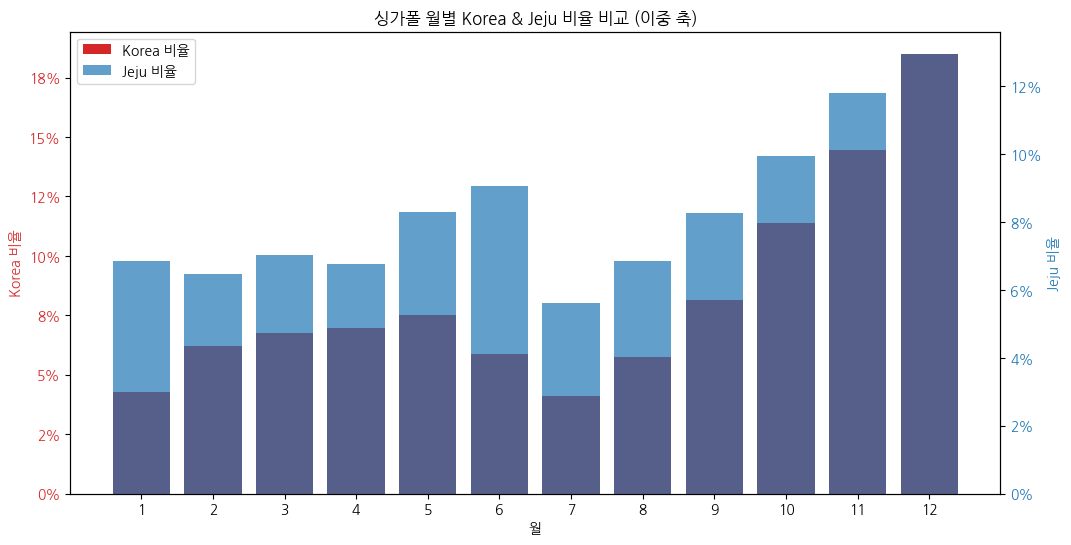

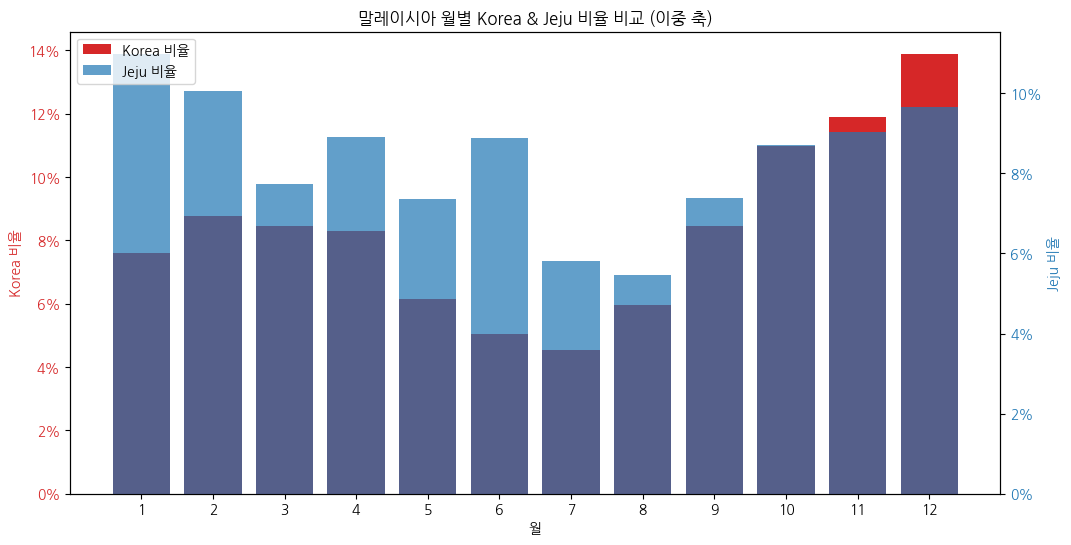

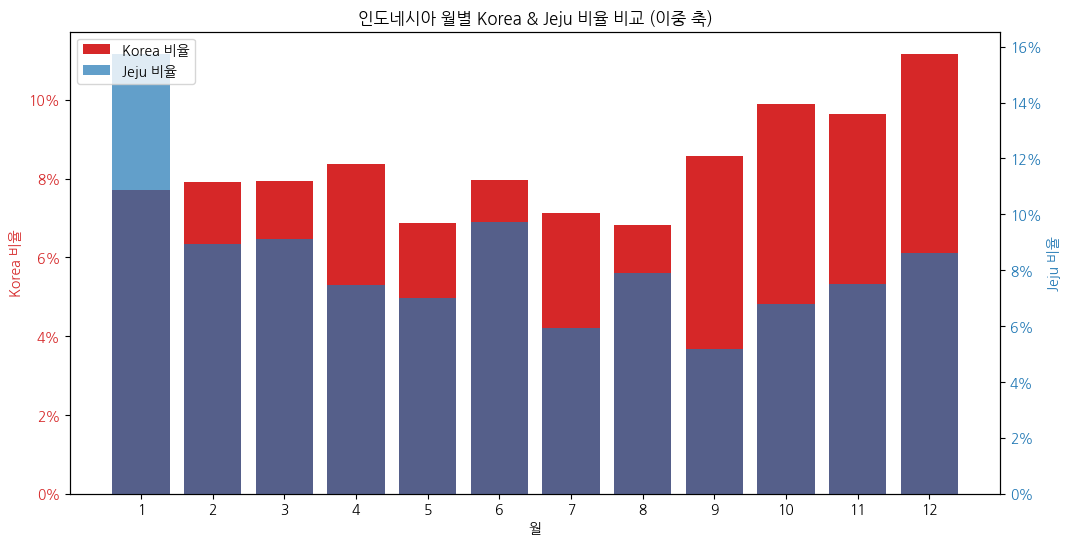

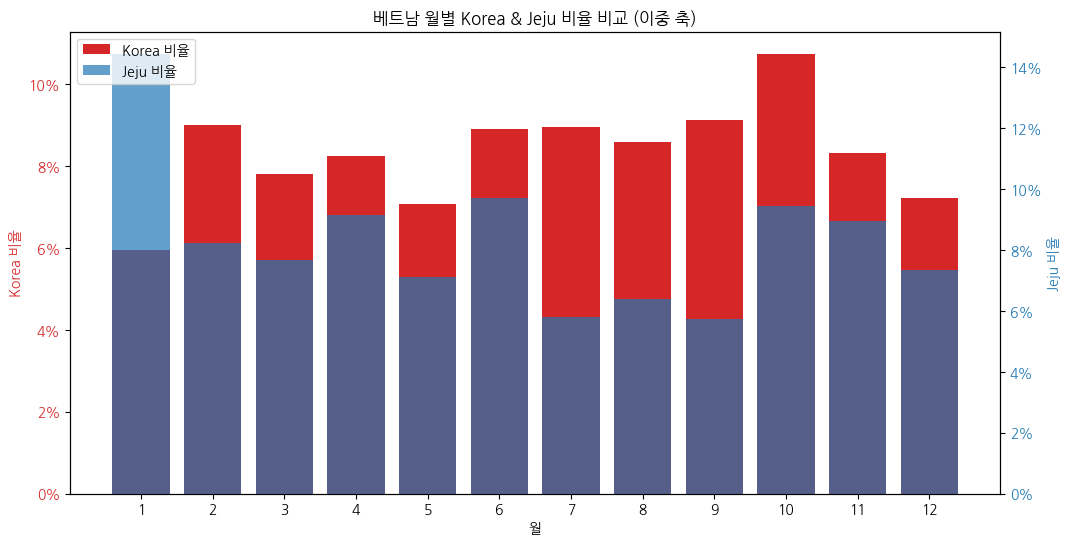

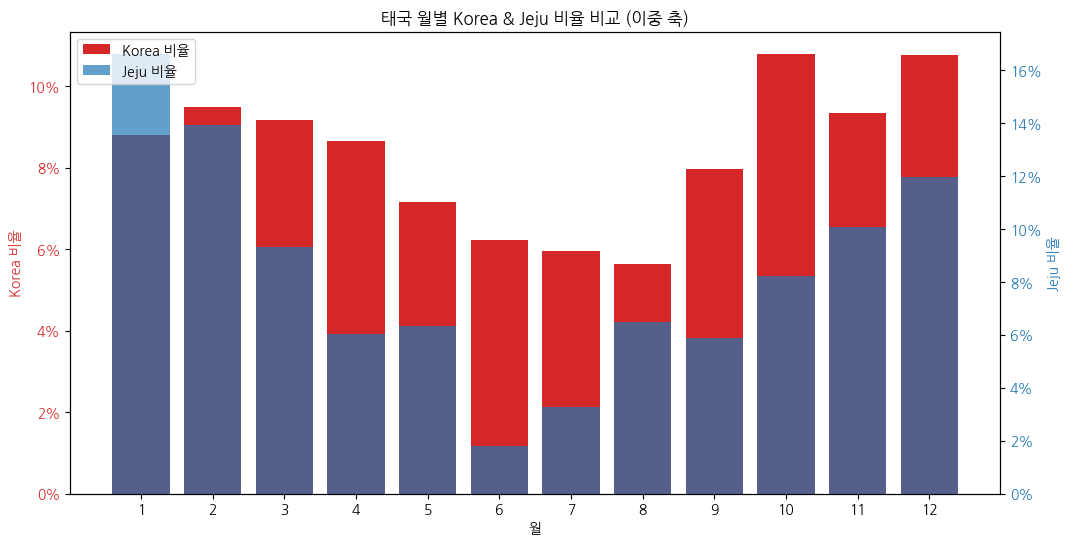

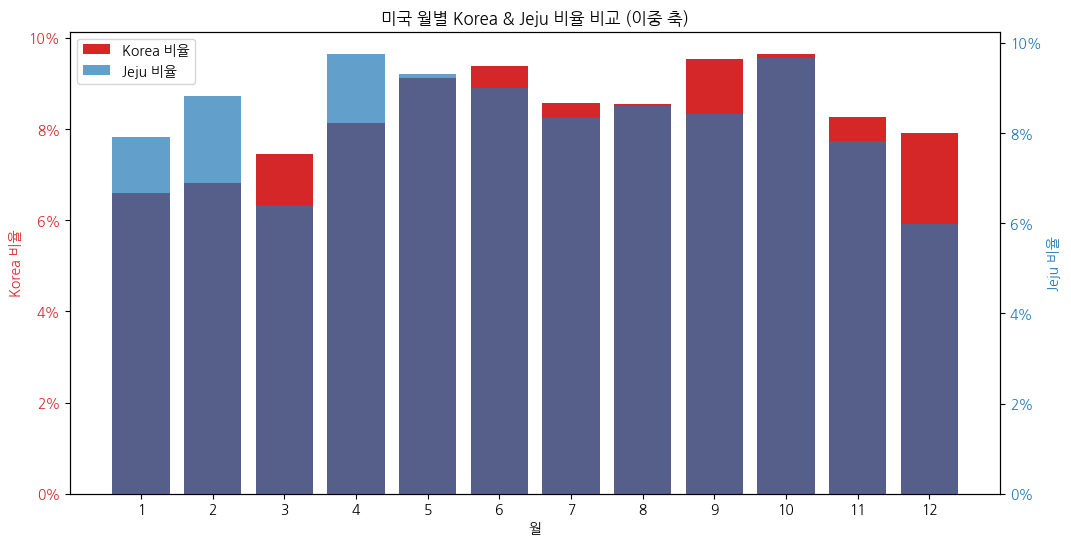

In [35]:
# prompt: country별로 각각의 월을 전체대비 비율로 시각화해서 korea과 jeju을 월별로 막대그래프 이중축을 이용해 비교해줘

# 월별 데이터를 기준으로 Korea와 Jeju의 비율을 계산합니다.
  # Changed code: Selecting only 'Korea' and 'Jeju' columns for sum
for c in df['Country'].unique():
  df_c = df[df['Country'] == c]
  monthly_data = df_c.groupby('Month')[['Korea', 'Jeju']].sum()
  monthly_data['Korea_Ratio'] = monthly_data['Korea'] / monthly_data['Korea'].sum()
  monthly_data['Jeju_Ratio'] = monthly_data['Jeju'] / monthly_data['Jeju'].sum()

  # 이중 축 그래프를 생성합니다.
  fig, ax1 = plt.subplots(figsize=(12, 6))

  # 첫 번째 y축 (Korea 비율)
  color = 'tab:red'
  ax1.set_xlabel('월')
  ax1.set_ylabel('Korea 비율', color=color)
  ax1.bar(monthly_data.index, monthly_data['Korea_Ratio'], color=color, label='Korea 비율')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


  # 두 번째 y축 (Jeju 비율)
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.set_ylabel('Jeju 비율', color=color)
  ax2.bar(monthly_data.index, monthly_data['Jeju_Ratio'], color=color, label='Jeju 비율', alpha=0.7) # alpha를 사용하여 투명도 조절
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

  # 범례 설정
  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels + labels2, loc='upper left')

  # 그래프 제목 및 x축 눈금 설정
  plt.title(f'{c} 월별 Korea & Jeju 비율 비교 (이중 축)')
  plt.xticks(monthly_data.index)

  # 그래프 표시
  plt.show()

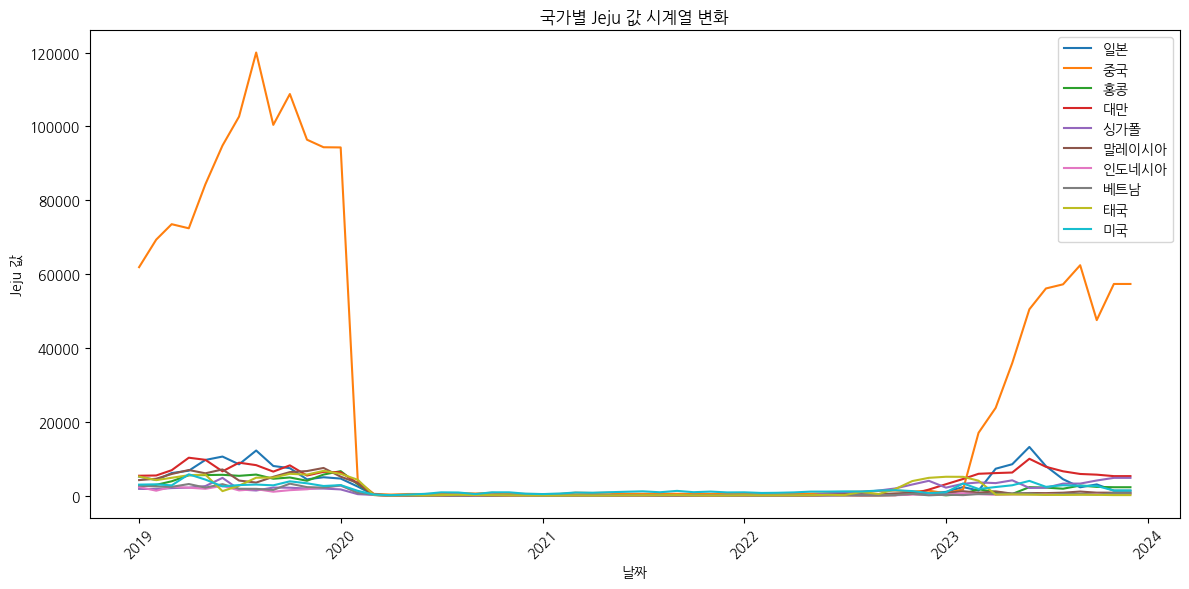

In [36]:
# prompt: Year, Month컬럼을 활용해 시계열로 국가별 jeju값을 한 그래프안에 시각화해줘

import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# 국가별 jeju 값 시계열 시각화 (한 그래프)
plt.figure(figsize=(12, 6))
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    sns.lineplot(x='Date', y='Jeju', data=country_df, label=country)
plt.title('국가별 Jeju 값 시계열 변화')
plt.xlabel('날짜')
plt.ylabel('Jeju 값')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() # 레이블이 잘리지 않도록 조정
plt.show()

In [37]:
# prompt: Year, Month컬럼을 활용해 시계열로 국가별 jeju2023값을 시각화해줘

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib
import warnings
import pandas as pd



# Assuming df is already loaded as in the previous code

# Convert 'Month' column to datetime objects if it's not already
# df['Month'] = pd.to_datetime(df['Month'])

# Create the time series plot using plotly express
fig = px.line(df, x='Date', y='Jeju', color='Country',
             title='국가별 제주도 여행객 추이',
             labels={'Month': '월', 'Jeju': '여행객 수', 'Country': '국가'})
fig.update_layout(xaxis_title="월", yaxis_title="여행객 수", title="국가별 제주도 여행객 추이")
fig.show()

In [38]:
# prompt: 중국을 제외한 그래프를 보여줘

# Assuming df is already loaded as in the previous code

# Filter out data for China
df_not_china = df[df['Country'] != '중국']

# Create the time series plot using plotly express
fig = px.line(df_not_china, x='Date', y='Jeju', color='Country',
             title='국가별 제주도 여행객 추이',
             labels={'Month': '월', 'Jeju': '여행객 수', 'Country': '국가'})
fig.update_layout(xaxis_title="월", yaxis_title="여행객 수", title="국가별 제주도 여행객 추이(중국제외)")
fig.show()

In [39]:
# prompt: 전체 국가별 연도별 jeju 퍼센테이지 파이차트로 시각화해줘

import plotly.express as px

# Assuming 'df' is your DataFrame with 'Country', 'Year', and 'Jeju' columns

# Group data by country and year, summing the 'Jeju' values
grouped_df = df.groupby(['Country', 'Year'])['Jeju'].sum().reset_index()

# Create the pie chart
for year in grouped_df['Year'].unique():
    year_df = grouped_df[grouped_df['Year'] == year]
    fig = px.pie(year_df, values='Jeju', names='Country', title=f'{year}년 국가별 제주 방문객 비율')
    fig.show()